### Census economic indicators time series

Brian Dew, @bd_econ, March 23, 2018

The documentation for retrieving these series from the API is [here](https://www.census.gov/data/developers/data-sets/economic-indicators.html). The example below retrieves the nondefense capital goods excluding aircraft new orders monthly percent change (basically a proxy for businesses new investment in equipment). Information on what is required to make the API call is [here](https://api.census.gov/data/timeseries/eits/m3/variables.html), and the list of individual series is [here](https://api.census.gov/data/timeseries/eits/eits_program_code_M3.xml).

In [19]:
import requests
import pandas as pd
import datetime as dt
import config
key = config.census_key

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
base = 'https://api.census.gov/data/timeseries/eits/m3'
param = 'cell_value,time_slot_id'
time = '&time=from+2015'
cat = '&category_code=NXA'
dtc = '&data_type_code=MPCNO'
oth = '&for=us&seasonally_adj=yes'

url = f'{base}?get={param}&key={key}{cat}{dtc}{time}{oth}'

In [4]:
r = requests.get(url).json()

In [28]:
df = pd.DataFrame({'date': [f'{i[4]}-01' for i in r[1:]], 
                   'value': [float(i[0]) for i in r[1:]]}).sort_values('date')

### Manually pull values from advanced report: https://www.census.gov/manufacturing/m3/adv/pdf/durgd.pdf

In [29]:
df = df.set_index('date')
df.at['2018-01-01'] = -0.4
df.at['2018-02-01'] = 1.8

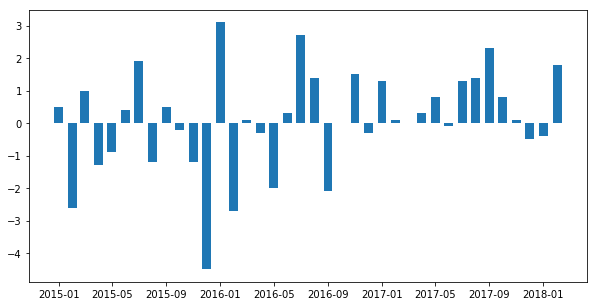

In [43]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.bar(x=pd.to_datetime(df.index), height=df['value'], width=20)
ax.xaxis_date()
